In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [3]:
data=pd.read_csv('loan_dataset.csv')
data.head()

,candidate_id,country,organization,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13
0,2.680550e+11,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,01-03-2012,May-12,95,1,...,0,0,0,1,0,0,0,0,0,1
1,6.728320e+11,Y,"Swanson, Newton and Miller",4.875,144000,360,01-01-2012,Mar-12,72,1,...,0,0,0,0,0,0,0,1,0,1
2,7.425150e+11,Z,Thornton-Davis,3.250,366000,180,01-01-2012,Mar-12,49,1,...,0,0,0,0,0,0,0,0,0,1
3,6.013860e+11,X,OTHER,4.750,135000,360,01-02-2012,Apr-12,46,2,...,0,0,0,0,0,1,1,1,1,1
4,2.738700e+11,X,OTHER,4.750,124000,360,01-02-2012,Apr-12,80,1,...,3,4,5,6,7,8,9,10,11,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   candidate_id              116058 non-null  float64
 1   country                   116058 non-null  object 
 2   organization              116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  int64  
 10  debt_to_income_ratio      116058 non-null  int64  
 11  borrower_credit_score     116058 non-null  int64  
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  i

In [5]:
data.isnull

<bound method DataFrame.isnull of         candidate_id country                organization  interest_rate  \
0       2.680550e+11       Z  Turner, Baldwin and Rhodes          4.250   
1       6.728320e+11       Y  Swanson, Newton and Miller          4.875   
2       7.425150e+11       Z              Thornton-Davis          3.250   
3       6.013860e+11       X                       OTHER          4.750   
4       2.738700e+11       X                       OTHER          4.750   
...              ...     ...                         ...            ...   
116053  3.821200e+11       Y               Browning-Hart          4.125   
116054  5.828040e+11       Z                       OTHER          3.000   
116055  8.379220e+11       X                       OTHER          3.875   
116056  4.773430e+11       X                       OTHER          4.250   
116057  7.633080e+11       Z              Thornton-Davis          3.375   

        unpaid_principal_bal  loan_term origination_date first_pa

In [6]:
data.shape

(116058, 29)

In [7]:
data1=data[data.E13==0]
data1=data1.sample(n=700)


data2=data[data.E13==1]
data = pd.concat([data1,data2])
data.shape

(1336, 29)

In [8]:
data.describe()

,candidate_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13
count,1.336000e+03,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,...,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,5.456837e+11,4.010621,196956.586826,304.766467,69.068114,1.476048,33.048653,745.312126,3.021707,362.532186,...,0.088323,0.141467,0.164671,0.202096,0.248503,0.306886,0.354042,0.433383,0.537425,0.476048
std,2.619774e+11,0.497934,109677.311786,83.823379,16.681569,0.499613,9.566477,57.875929,8.381108,381.825584,...,0.416493,0.554358,0.674730,0.786322,0.898395,1.032134,1.190329,1.338586,1.497596,0.499613
min,1.001020e+11,2.625000,14000.000000,120.000000,11.000000,1.000000,7.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.152258e+11,3.750000,115000.000000,180.000000,60.000000,1.000000,26.000000,702.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.476155e+11,4.000000,170000.000000,360.000000,75.000000,1.000000,34.000000,760.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.764308e+11,4.375000,258250.000000,360.000000,80.000000,2.000000,41.000000,792.000000,0.000000,773.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.996720e+11,5.875000,626000.000000,360.000000,97.000000,2.000000,50.000000,829.000000,35.000000,828.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [9]:
data.columns

Index(['candidate_id', 'country', 'organization', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
       'E13'],
      dtype='object')

In [10]:
data[[
       'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
           'E13']]

,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,E1,...,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13
60190,330000,360,80,1,40,775,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60502,171000,180,70,2,21,796,0,796,0,0,...,0,0,0,0,0,0,0,0,0,0
7919,315000,360,68,2,41,764,0,790,0,0,...,0,0,0,0,0,0,0,0,0,0
20531,190000,360,62,2,25,803,0,786,0,0,...,0,1,0,0,0,0,0,0,0,0
55659,312000,360,80,1,17,813,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,75000,180,27,1,32,683,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
632,332000,180,79,2,44,662,0,658,0,0,...,0,0,0,0,0,0,0,0,0,1
633,70000,180,11,1,40,663,0,0,0,0,...,0,0,1,0,0,1,1,1,2,1
634,82000,360,23,1,42,767,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
data['E13']

60190    0
60502    0
7919     0
20531    0
55659    0
        ..
631      1
632      1
633      1
634      1
635      1
Name: E13, Length: 1336, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(data[[
       'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
    ]],data['E13'], test_size=0.2, random_state =0)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve



In [ ]:
def models(Select_model):
    
    if Select_model == "1":
        print('LOGISTIC REGRESSION')
        logistic=LogisticRegression()
        logistic.fit(X_train,y_train)
        LR_prediction=logistic.predict(X_test)
        print(f'Using Logistic regression : {accuracy_score(LR_prediction, y_test)}')
        print(confusion_matrix(LR_prediction, y_test))
        
        
        pred_prob = logistic.predict_proba(X_test)
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
        random_probs = [0 for i in range(len(y_test))]
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
        auc_score = roc_auc_score(y_test, pred_prob[:,1])
        print(auc_score)
        
        plt.style.use('seaborn')

        plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
        plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
        plt.title('ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')
        plt.savefig('ROC',dpi=300)
        plt.show();
        
    elif Select_model == "2":
        random=RandomForestClassifier()
        random.fit(X_train,y_train)
        Random_prediction=random.predict(X_test)
        print(f'RandomForestClassifier : {accuracy_score(Random_prediction, y_test)}')
        print(confusion_matrix(Random_prediction, y_test))
        
        pred_prob = random.predict_proba(X_test)
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
        random_probs = [0 for i in range(len(y_test))]
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
        auc_score = roc_auc_score(y_test, pred_prob[:,1])
        print(auc_score)
        
        
        plt.style.use('seaborn')
        plt.plot(fpr, tpr, linestyle='--',color='orange', label='RandomForestClassifier')
        plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
        plt.title('ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')
        plt.savefig('ROC',dpi=300)
        plt.show();
    elif Select_model == "3":
        Tree=DecisionTreeClassifier()
        Tree.fit(X_train,y_train)
        Tree_prediction=Tree.predict(X_test)
        print(f'DecisionTreeClassifier : {accuracy_score(Tree_prediction, y_test)}')
        print(confusion_matrix(Tree_prediction, y_test))
        
        pred_prob = Tree.predict_proba(X_test)
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
        random_probs = [0 for i in range(len(y_test))]
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
        auc_score = roc_auc_score(y_test, pred_prob[:,1])
        print(auc_score)
        
        plt.style.use('seaborn')
        plt.plot(fpr, tpr, linestyle='--',color='orange', label='DecisionTreeClassifier')
        plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
        plt.title('ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')
        plt.savefig('ROC',dpi=300)
        plt.show();

enter model name to validate 
 1.LogisticRegresion 
 2.RandomForestClassifier 
 3.DecisionTreeClassifier 
 Other number to exit 
3
DecisionTreeClassifier : 0.6940298507462687
[[93 43]
 [39 93]]
0.6941844919786098


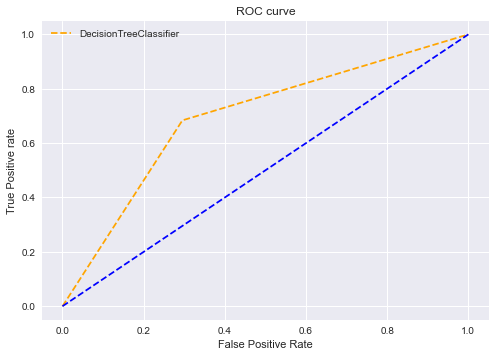

enter model name to validate 
 1.LogisticRegresion 
 2.RandomForestClassifier 
 3.DecisionTreeClassifier 
 Other number to exit 
5


In [18]:
i=1
while i != 0:
    inp=int(input("enter model name to validate \n 1.LogisticRegresion \n 2.RandomForestClassifier \n 3.DecisionTreeClassifier \n Other number to exit \n"))
    if inp==1:
        models(str(inp))
    elif inp==2:
        models(str(inp))
    elif inp==3:
        models(str(inp))
    else:
        break
        